In [1]:
pip install scSpectra

Note: you may need to restart the kernel to use updated packages.


In [2]:
# packages
import scanpy as sc
import scanpy.external as sce
import anndata as anndata
#import diffxpy.api as de
from anndata import AnnData
import time
import os
import numpy as np
import seaborn as sns
import pandas as pd
import re
import h5py
import scipy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as patches
import matplotlib.colors as colors
import matplotlib.font_manager
import glob
from collections import OrderedDict
from scipy.sparse import csr_matrix
from scanpy.external.pp import magic
from scipy.stats import zscore
import scipy.cluster.hierarchy as hc
from statistics import median
import math
from typing import Union

import numpy.matlib

import numpy as np
import json
import scanpy as sc
from collections import OrderedDict
import scipy
import pandas as pd
import matplotlib.pyplot as plt

#spectra imports
import Spectra as spc
from Spectra import Spectra_util as spc_tl
from Spectra import K_est as kst
from Spectra import default_gene_sets
import os

In [3]:
os.getcwd()

'/Users/jyotirmoyroy/Desktop/T1S_ImmunometabolismPaper/SingleCellRNASeq'

In [4]:
# load the default gene set dictionary from the Spectra paper:
annotations = spc.default_gene_sets.load()

In [5]:
pip install cytopus

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pygraphviz as pgv
print(pgv.__version__)

2.0beta0.dev0


In [7]:
#pyvis is required for plotting interactive graphs
!pip install pyvis

In [8]:
import cytopus as cp
import IPython

In [9]:
G = cp.KnowledgeBase()

KnowledgeBase object containing 92 cell types and 201 cellular processes



In [10]:
pip install mygene

Note: you may need to restart the kernel to use updated packages.


In [11]:
import mygene
import pandas as pd
import contextlib
import io

# Initialize mygene
mg = mygene.MyGeneInfo()

def convert_genes_to_mouse(human_genes):
    # Convert all gene symbols to uppercase for consistency
    human_genes = [gene.upper() for gene in human_genes]

    # Suppress mygene output during the query
    with contextlib.redirect_stdout(io.StringIO()), contextlib.redirect_stderr(io.StringIO()):
        # Query MyGene.info for mouse orthologs
        query = mg.querymany(
            human_genes, 
            scopes="symbol", 
            fields="symbol,entrezgene,ensembl.gene", 
            species="mouse", 
            as_dataframe=True
        )
    missing_genes = []
    # Extract mapped mouse genes
    mapped_genes = []
    for _, row in query.iterrows():
        if pd.notna(row['symbol']) and pd.notna(row['entrezgene']):  # If the gene was found
            mapped_genes.append(row['symbol'])
        else:  # If the gene was not found
            missing_gene = row.name  # The index contains the original query term
            missing_genes.append(missing_gene)


    # Manual mappings for genes that were not found
    manual_mappings = {
        'ZADH2': 'Zadh2',
        'ADH1A': 'Adh1',
        'PNPLA4': 'Pnpla4',
        'ADH1B': 'Adh1',
        'ADH1C': 'Adh1',
        'IFNA21': 'Ifna',
        'IFNA8': 'Ifna',
        'CASP10': 'Casp10',
        'IFNA17': 'Ifna',
        'DDX58': 'Ddx58',
        'IFNW1': 'Ifnw1',
        'MYL5': 'Myl5',
        'MT1X': 'Mt1',
        'TP53I3': 'Trp53i3',
        'MT2A': 'Mt2',
        'C3ORF52': 'C3orf52',
        'TP63': 'Trp63',
        'TP53': 'Trp53',
        'H2AW': 'H2aw',
        'H1-2': 'H1f2',
        'ZNF365': 'Zfp365',
        'RAB7A': 'Rab7',
        'MAP1LC3C': 'Map1lc3c',
        'ARNTL': 'Arntl',
        'KIF4A': 'Kif4a',
        'SGO2': 'Sgo2',
        'IRGM': 'Irgm',
        'SUPT5H': 'Supt5h',
        'LACRT': 'Lacrt',
        'SLCO1A2': 'Slco1a2',
        'SULT1A2': 'Sult1a2',
        'MMP1': 'Mmp1',
        'CCL16': 'Ccl16',
        'CXCL6': 'Cxcl6',
        'TNFRSF10C': 'Tnfrsf10c',
        'KITLG': 'Kitlg',
        'BCL2A1': 'Bcl2a1',
        'ICOSLG': 'Icoslg',
        'FTL': 'Ftl',
        'TF': 'Tf',
        'MAN1A1': 'Man1a1',
        'ALG10': 'Alg10',
        'CD59': 'Cd59',
        'ENOSF1': 'Enosf1',
        'SCD': 'Scd',
        'LILRB5': 'Lilrb5',
        'CCL18': 'Ccl18',
        'C1S': 'C1s',
        'C1R': 'C1r',
        'C5': 'C5',
        'CKMT1B': 'Ckmt1b',
        'H2BC19P': 'H2bc19',
        'H1-4': 'H1f4',
        'H2BC17': 'H2bc17',
        'H2BC10': 'H2bc10',
        'H3-2': 'H3f2',
        'H4C13': 'H4c13',
        'H2AC16': 'H2ac16',
        'H2BP2': 'H2bp2',
        'H2BP1': 'H2bp1',
        'H2AZP3': 'H2azp3',
        'H2BU1': 'H2bu1',
        'C1ORF68': 'C1orf68',
        'HBD': 'Hbd',
        'C10ORF90': 'C10orf90',
        'OR10H3': 'Olfr123',
        'SIGLEC5': 'Siglec5',
        'ZNF90': 'Zfp90',
        'ZNF493': 'Zfp493',
        'STH': 'Sth',
        'ZNF557': 'Zfp557',
        'REG1A': 'Reg1a',
        'IL4R': 'Il4r',
        'CA12': 'Ca12',
        'GPI': 'Gpi',
        'MT1E': 'Mt1',
        'ZNF292': 'Zfp292',
        'GABARAPL3': 'Gabarapl3',
        'GBA': 'Gba',
        'MAP1LC3B2': 'Map1lc3b2',
        'TMSB4XP8': 'Tmsb4x',
        'FGF19': 'Fgf19',
        'TMSB4Y': 'Tmsb4y',
        'INS': 'Ins',
        'IFI6': 'Ifi6',
        'OASL': 'Oasl',
        'ZNF697': 'Zfp697',
        'ZBED2': 'Zbed2',
        'SIAH1': 'Siah1',
        'KIAA1549L': 'Kiaa1549l',
        'SI': 'Si',
        'IL26': 'Il26',
        'GBA': 'Gba',
        'CD8B': 'Cd8b',
        'ATP6V0E1': 'Atp6v0e1',
        'CHMP4A': 'Chmp4a',
        'CD244': 'Cd244',
        'TTC37': 'Ttc37',
        'GLUD2': 'Glud2',
        'STX4': 'Stx4',
        'CHST6': 'Chst6',
        'CYP2C18': 'Cyp2c18',
        'PRB3': 'Prb3',
        'LYZ': 'Lyz',
        'SERPINB3': 'Serpinb3',
        'S100P': 'S100p',
        'CA2': 'Ca2',
        'CST1': 'Cst1',
        'CSTA': 'Csta',
        'SH2D1B': 'Sh2d1b',
        'YAE1': 'Yae1',
        'LDHAL6A': 'Ldhal6a',
        'NLRP9': 'Nlrp9b',
        'GSDMB': 'Gsdmb',
        'G6PD': 'G6pd',
        'PRAMEF6': 'Pramef6',
        'RNF175': 'Rnf175',
        'RNF103-CHMP3': 'Chmp3',
        'CAMLG': 'Camlg',
        'GPI': 'Gpi',
        'ABCF2-H2BE1': 'H2be1',
        'SLC9A3R1': 'Slc9a3r1',
        'CYP51A1': 'Cyp51a1',
        'DEFB123': 'Defb123',
        'C17ORF78': 'C17orf78',
        'PTTG3P': 'Pttg3p',
        'TAF1L': 'Taf1l',
        'DDX53': 'Ddx53',
        'APOBEC3B': 'Apobec3b',
        'TEPP': 'Tepp',
        'ALPP': 'Alpp',
        'CLC': 'Clc',
        'GK3P': 'Gk3p',
        'LGALS13': 'Lgals13',
        'ALPG': 'Alpg',
        'IL6R': 'Il6r',
        'IL11RA': 'Il11ra',
        'CSH1': 'Csh1',
        'CSH2': 'Csh2',
        'GH2': 'Gh2',
        'GH1': 'Gh1',
        'ZNRD1': 'Znrd1',
        'NT5C3A': 'Nt5c3a',
        'ZNF707': 'Zfp707',
        'SUPT4H1': 'Supt4h1',
        'BOLA2B': 'Bola2b',
        'TP53INP1': 'Trp53inp1',
        'STX5': 'Stx5',
        'UGT2B17': 'Ugt2b17',
        'ABCB1': 'Abcb1',
        'ACAA1': 'Acaa1',
        'PHB': 'Phb',
        'TP53INP2': 'Trp53inp2',
        'TRIM34': 'Trim34',
        'TRIM22': 'Trim22',
        'ST6GALNAC2': 'St6galnac2',
        'SERTAD4-AS1': 'Sertad4-as1',
        'TMEM178A': 'Tmem178a',
        'CAPN14': 'Capn14',
        'HSPB11': 'Hspb11',
        'CA6': 'Ca6',
        'CD1D': 'Cd1d',
        'CA4': 'Ca4',
        'CCDC58': 'Ccdc58',
        'CYP4A22': 'Cyp4a22',
        'SERPINA1': 'Serpina1',
        'GZMH': 'Gzmh',
        'FGFBP2': 'Fgfbp2',
        'GNLY': 'Gnly',
        'CHIA': 'Chia',
        'CENPJ': 'Cenpj',
        'C4ORF33': 'C4orf33',
        'TSTA3': 'Tsta3',
        'RNASE2': 'Rnase2',
        'GSTT2B': 'Gstt2b',
        'LGALS9B': 'Lgals9b',
        'FLT3LG': 'Flt3lg',
        'SERPINB6': 'Serpinb6',
        'EFCAB1': 'Efcab1',
        'ZNF124': 'Zfp124',
        'BVES': 'Bves',
        'C12ORF49': 'C12orf49',
        'ZNF623': 'Zfp623',
        'KIAA0513': 'Kiaa0513',
        'ZNF770': 'Zfp770',
        'OXCT2': 'Oxct2',
        'CTSV': 'Ctsv',
        'AKR7A2': 'Akr7a2',
        'HLA-C': 'H2-L',
        'HLA-A': 'H2-K',
        'HLA-B': 'H2-D',
        'ANKH': 'Ankh',
        'H1-0': 'H1f0',
        'BCL2L2-PABPN1': 'Pabpn1',
        'PEA15': 'Pea15',
        'PXDNL': 'Pxdnl',
        'CES2': 'Ces2',
        'ZNF641': 'Zfp641',
        'CD1C': 'Cd1c',
        'ZNF398': 'Zfp398',
        'VNN2': 'Vnn2',
        'CYP2C8': 'Cyp2c8',
        'CYP2A13': 'Cyp2a13',
        'CYP2C9': 'Cyp2c29',
        'CYP2B6': 'Cyp2b6',
        'ALOX15B': 'Alox8',
        'ZNF516': 'Zfp516',
        'STATH': 'Stath',
        'TXN': 'Txn',
        'S100A12': 'S100a12',
        'S100A7': 'S100a7',
        'DEFB4B': 'Defb4b',
        'GALNT8': 'Galnt8',
        'ARMC4': 'Armc4',
        'MIR1915HG': 'Mir1915hg',
        'ZNF467': 'Zfp467',
        'KLK3': 'Klk3',
        'C19ORF38': 'C19orf38',
        'C1ORF229': 'C1orf229',
        'CES1': 'Ces1',
        'ZNF579': 'Zfp579',
        'NKX2-8': 'Nkx2-8',
        'CXCL6': 'Cxcl6',
        'MT1M': 'Mt1',
        'MT1G': 'Mt1',
        'GBP1': 'Gbp1',
        'IL32': 'Il32',
        'OAS1': 'Oas1',
        'FCGR3A': 'Fcgr3a',
        'BTN3A2': 'Btn3a2',
        'REN': 'Ren',
        'SCD5': 'Scd5',
        'NCR3': 'Ncr3',
        'C3ORF18': 'C3orf18',
        'CYP4A11': 'Cyp4a12a',
        'CYP3A4': 'Cyp3a11',
        'CYP2A6': 'Cyp2a5',
        'AKR1C4': 'Akr1c18',
        'CYP4F2': 'Cyp4f14',
        'CA13': 'Car13',
        'NLRP1': 'Nlrp1a',
        'PYDC1': 'Pydc3',
        'NAIP': 'Naip1',
        'ADH6': 'Adh6b',
        'CD58': 'Cd58',  # CD58 is conserved in mice
    'FCER2': 'Fcer2a',  # Mouse ortholog of human FCER2
    'CD24': 'Cd24a',  # Mouse ortholog of human CD24
    'TM4SF18': 'Tm4sf18',  # Mouse ortholog of human TM4SF18
    'CCL21': 'Ccl21',  # Mouse ortholog of human CCL21
    'TNFRSF10A': 'Tnfrsf10a',  # Mouse ortholog of human TNFRSF10A
    'LILRB1': 'Pirb',  # Mouse ortholog of human LILRB1
    'CR1': 'Crry',  # Mouse ortholog of human CR1 (complement receptor 1)
    'ZNF385D': 'Zfp385d',  # Mouse ortholog of human ZNF385D
    'CYP3A5': 'Cyp3a11',  # Mouse ortholog of human CYP3A5
    'KIAA1217': 'Kiaa1217',  # Mouse ortholog of human KIAA1217
    'KLRF1': 'Klrf1',  # Mouse ortholog of human KLRF1
    'CLEC4C': 'Clec4c',  # Mouse ortholog of human CLEC4C
    'LILRB4': 'Pirb',  # Mouse ortholog of human LILRB4
    'LILRA4': 'Pira',  # Mouse ortholog of human LILRA4
    'IGHA1': 'Igha',  # Mouse ortholog of human IGHA1
    'IGHA2': 'Igha',  # Mouse ortholog of human IGHA2
    'IGHG1': 'Ighg1',  # Mouse ortholog of human IGHG1
    'IGHG2': 'Ighg2',  # Mouse ortholog of human IGHG2
    'IGHG4': 'Ighg4',  # Mouse ortholog of human IGHG4
    'CEACAM8': 'Ceacam8',  # Mouse ortholog of human CEACAM8
    'FCGR3B': 'Fcgr3',  # Mouse ortholog of human FCGR3B
    'AZU1': 'Azurocidin',  # Mouse ortholog of human AZU1
    'LILRA2': 'Pira',  # Mouse ortholog of human LILRA2
    'CLEC4A': 'Clec4a',  # Mouse ortholog of human CLEC4A
    'NCR2': 'Ncr2',  # Mouse ortholog of human NCR2
    'FCGR1B': 'Fcgr1',  # Mouse ortholog of human FCGR1B
    'FCGR2A': 'Fcgr2a',  # Mouse ortholog of human FCGR2A
    'FCGR1A': 'Fcgr1a',  # Mouse ortholog of human FCGR1A
    'CD1A': 'Cd1d1',  # Mouse ortholog of human CD1A
    'CD209': 'Cd209a',  # Mouse ortholog of human CD209
    'TRDC': 'Trdc',  # Mouse ortholog of human TRDC
    'FCN3': 'Fcn3',  # Mouse ortholog of human FCN3
    'TRBC1': 'Trbc1',  # Mouse ortholog of human TRBC1
    'TRAC': 'Trac',  # Mouse ortholog of human TRAC
    }
    # Add manual mappings for missing genes
    unresolved_genes = []
    # Add manual mappings to the mapped_genes list
    for human_gene in missing_genes:
        if human_gene in manual_mappings:
            mapped_genes.append(manual_mappings[human_gene])
        else:
            unresolved_genes.append(human_gene)

    # Report unresolved genes (genes still missing after manual mappings)
    if unresolved_genes:
        print(f"Warning: No match found for {unresolved_genes}")
    # Ensure the final list is unique
    mapped_genes = list(set(mapped_genes))

    return mapped_genes

human_genes = ["TP53", "MYC", "GATA3", "CD8A"]
mouse_genes = convert_genes_to_mouse(human_genes)
print(mouse_genes)

['Myc', 'Gata3', 'Trp53', 'Cd8a']


In [12]:
celltype_of_interest = ['Mac']  
global_celltypes = ['all-cells','leukocyte','Mac']

In [13]:
G.get_celltype_processes(celltype_of_interest,global_celltypes = global_celltypes,get_children=True,get_parents =True,
                        child_depth=1,parent_depth=1)

In [14]:
conversion_dict = {
 'Mac':'Mac'}

#to map KnowledgeBase labels back to labels in data
conversion_dict_inv = {}
for i,v in conversion_dict.items():
    conversion_dict_inv[v]=i
conversion_dict_inv['global'] = 'global'

In [15]:
# Convert genes for cell type processes
for celltype, processes_dict in G.celltype_process_dict.items():
    for process, genes in processes_dict.items():
        G.celltype_process_dict[celltype][process] = convert_genes_to_mouse(genes)

In [16]:
G.celltype_process_dict.items()

dict_items([('Mac', {'M_IL17A_response': ['Il1b', 'Il12a', 'Ifng', 'Cxcl3', 'Ccl3', 'Csf2', 'Il9', 'Il12b'], 'M_mac_CSF1_response': ['Pltp', 'Slc47a1', 'Vat1', 'Hadh', 'Pebp1', 'Scd', 'Slc38a6', 'Vsig4', 'Rragd', 'Zfyve26', 'Sqle', 'Acp5', 'Acat2', 'Cep55', 'Rgl1', 'Spp1', 'Itgb5', 'Idh1', 'Cyb5a', 'Dhcr7', 'Dhcr24', 'A2m', 'C3ar1', 'Enosf1', 'Nr1h3', 'Ptprm', 'Plpp3', 'Ctsk', 'Lgmn', 'Mgll', 'Lilrb5', 'Gnpda1', 'Jakmip2', 'Plxna1', 'Snx24', 'Npc1', 'Frmd4a', 'Dennd2d', 'Acot13', 'Tspan4', 'Slc7a8', 'Cd59', 'Aldh7a1', 'Apoe', 'C1qb', 'Ccl2', 'Nrp1', 'Etv5', 'Fuca1', 'Gpr137b', 'Optn', 'Colec12', 'Marco', 'Mapk13', 'Hsd17b14', 'Dram1', 'Rnase1', 'Rad51ap1', 'Maf', 'Melk', 'Tyms', 'Ctsl', 'Rab3il1', 'Plau', 'Apoc1', 'Bcat1', 'Hamp', 'Pla2g15', 'Msr1', 'Mmp9', 'Qprt', 'Pparg', 'Rarres1', 'Lima1', 'Dab2', 'Top2a', 'Slc39a8', 'Ecm1', 'Ccnd1', 'Slc2a5', 'Acp2', 'Fasn', 'Gpnmb', 'Epas1', 'Ms4a4a', 'Adamdec1', 'Npl', 'Hacd3'], 'M_angiogenic-effectors': ['Vegfc', 'Plau', 'Angpt2', 'Pdgfb', 'Jag

In [17]:
#convert celltype labels back to celltypes in data
Spectra_dict_Mac = {}

for i,v in G.celltype_process_dict.items():
    Spectra_dict_Mac[conversion_dict_inv[i]] = v

In [18]:
Spectra_dict_Mac.keys()

dict_keys(['Mac', 'global'])

In [19]:
Spectra_dict_Mac['Mac'].keys()

dict_keys(['M_IL17A_response', 'M_mac_CSF1_response', 'M_angiogenic-effectors'])

In [9]:
#store Spectra dictionary

import json
jpath = 'Spectra_dict_Mac.json'

with open(jpath, 'w') as f:
    json.dump(Spectra_dict_Mac,f)
print('saved data to:',jpath)

NameError: name 'Spectra_dict_Mac' is not defined

In [11]:
#load Spectra dictionary

import json
jpath = '/Users/jyotirmoyroy/Desktop/Immunometabolism T1D Paper/Data/Sequencing/SingleCellRNASeq/Spectra/T1D_Timepoints/Macrophage/Spectra_dict_Mac.json'
f = open(jpath, 'r')
Spectra_dict_Mac = json.loads(f.read())

In [12]:
# Subset for CD8TCells (keeping only 'CD8 exhausted effector-like' and 'CD8 memory')
# Filter for 'CD8 exhausted effector-like' and 'CD8 memory' in 'CellSubType'
Mac_NODRagInt = sc.read("/Users/jyotirmoyroy/Desktop/Immunometabolism T1D Paper/Data/Sequencing/SingleCellRNASeq/ProcessedRDSFile/Macrophage_NODRag_int.h5ad")

#T1D_Timepoints[T1D_Timepoints.obs['CellSubType'].isin(['Macrophage'])].copy()

# Check the number of cells in each subset
print("Mac", Mac_NODRagInt.shape)

Mac (4218, 17950)


In [13]:
list(set(Mac_NODRagInt.obs['CellType']))

['Macrophage']

In [14]:
# To view gene names in the AnnData object
gene_names = Mac_NODRagInt.var_names  # For AnnData format, this holds the gene names
print(gene_names)


Index(['Lypla1', 'Tcea1', 'Atp6v1h', 'Rb1cc1', 'Pcmtd1', 'Rrs1', 'Adhfe1',
       'Mybl1', 'Vcpip1', 'Sgk3',
       ...
       'Tmlhe', 'AC133103.1', 'AC132444.1', 'Csprs', 'A530040E14RIK',
       'AC168977.2', 'AC168977.1', 'PISD', 'DHRSX', 'Cd99'],
      dtype='object', length=17950)


In [15]:
print(Spectra_dict_Mac)

{'Mac': {'M_IL17A_response': ['Il1b', 'Il12a', 'Ifng', 'Cxcl3', 'Ccl3', 'Csf2', 'Il9', 'Il12b'], 'M_mac_CSF1_response': ['Pltp', 'Slc47a1', 'Vat1', 'Hadh', 'Pebp1', 'Scd', 'Slc38a6', 'Vsig4', 'Rragd', 'Zfyve26', 'Sqle', 'Acp5', 'Acat2', 'Cep55', 'Rgl1', 'Spp1', 'Itgb5', 'Idh1', 'Cyb5a', 'Dhcr7', 'Dhcr24', 'A2m', 'C3ar1', 'Enosf1', 'Nr1h3', 'Ptprm', 'Plpp3', 'Ctsk', 'Lgmn', 'Mgll', 'Lilrb5', 'Gnpda1', 'Jakmip2', 'Plxna1', 'Snx24', 'Npc1', 'Frmd4a', 'Dennd2d', 'Acot13', 'Tspan4', 'Slc7a8', 'Cd59', 'Aldh7a1', 'Apoe', 'C1qb', 'Ccl2', 'Nrp1', 'Etv5', 'Fuca1', 'Gpr137b', 'Optn', 'Colec12', 'Marco', 'Mapk13', 'Hsd17b14', 'Dram1', 'Rnase1', 'Rad51ap1', 'Maf', 'Melk', 'Tyms', 'Ctsl', 'Rab3il1', 'Plau', 'Apoc1', 'Bcat1', 'Hamp', 'Pla2g15', 'Msr1', 'Mmp9', 'Qprt', 'Pparg', 'Rarres1', 'Lima1', 'Dab2', 'Top2a', 'Slc39a8', 'Ecm1', 'Ccnd1', 'Slc2a5', 'Acp2', 'Fasn', 'Gpnmb', 'Epas1', 'Ms4a4a', 'Adamdec1', 'Npl', 'Hacd3'], 'M_angiogenic-effectors': ['Vegfc', 'Plau', 'Angpt2', 'Pdgfb', 'Jag2', 'Pf4', '

In [16]:
import pandas as pd

# Add a new column 'celltype' to the .obs metadata
Mac_NODRagInt.obs['celltype'] = 'Mac'

# Verify the new column
print(Mac_NODRagInt.obs.head())


                                              orig.ident  nCount_RNA  \
T1D_Timepoints_AAACCAATCTAAGTCTAGAGGCAA-1  SeuratProject      1917.0   
T1D_Timepoints_AAGCGGCTCCGCACCAAGAGGCAA-1  SeuratProject       503.0   
T1D_Timepoints_AAGGGAGGTTAGCATCAGAGGCAA-1  SeuratProject       700.0   
T1D_Timepoints_AATGGATGTAAGGTTGAGAGGCAA-1  SeuratProject       556.0   
T1D_Timepoints_AATGGATGTAAGTCGAAGAGGCAA-1  SeuratProject       881.0   

                                           nFeature_RNA  percent.mt   sample  \
T1D_Timepoints_AAACCAATCTAAGTCTAGAGGCAA-1          1254   10.328638  Week6_1   
T1D_Timepoints_AAGCGGCTCCGCACCAAGAGGCAA-1           379    0.994036  Week6_1   
T1D_Timepoints_AAGGGAGGTTAGCATCAGAGGCAA-1           592    0.285714  Week6_1   
T1D_Timepoints_AATGGATGTAAGGTTGAGAGGCAA-1           446    0.179856  Week6_1   
T1D_Timepoints_AATGGATGTAAGTCGAAGAGGCAA-1           666    0.227015  Week6_1   

                                            time           group    CellType  \
T1D_Ti

In [17]:
Spectra_dict_Mac = spc_tl.check_gene_set_dictionary(
    Mac_NODRagInt,
    Spectra_dict_Mac,
    obs_key='celltype',
    global_key='global')

Cell type labels in gene set annotation dictionary and AnnData object are identical
Your gene set annotation dictionary is now correctly formatted.


In [23]:
import scanpy as sc

# Log-transform data to prevent overflow
Mac_NODRagInt.X = np.log1p(Mac_NODRagInt.X)

# Now run highly variable genes selection
sc.pp.highly_variable_genes(Mac_NODRagInt, flavor='seurat', n_top_genes=2000)


In [25]:
# fit the model (We will run this with only 2 epochs to decrease runtime in this tutorial)

Mac_NODRagInt.X = Mac_NODRagInt.X.toarray() if scipy.sparse.issparse(Mac_NODRagInt.X) else Mac_NODRagInt.X

model = spc.est_spectra(adata=Mac_NODRagInt,
    gene_set_dictionary=Spectra_dict_Mac,
    use_highly_variable=True,
    cell_type_key="celltype",
    use_weights=True,
    lam=0.1, # varies depending on data and gene sets, try between 0.5 and 0.001
    delta=0.001,
    kappa=None,
    rho=0.001,
    use_cell_types=True,
    n_top_vals=50,
    label_factors=True,
    overlap_threshold=0.2,
    clean_gs = True,
    min_gs_num = 3,
    num_epochs=10000#here running only 2 epochs for time reasons, we recommend 10,000 epochs for most datasets
)

Cell type labels in gene set annotation dictionary and AnnData object are identical
Your gene set annotation dictionary is now correctly formatted.


 63%|███████████████████████████████████████▊                       | 6321/10000 [28:55<16:49,  3.64it/s]
/Users/jyotirmoyroy/miniconda3/lib/python3.12/site-packages/Spectra/Spectra.py:1340: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Extl3' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[i,j] = id2word[idx_matrix[i,j]]
/Users/jyotirmoyroy/miniconda3/lib/python3.12/site-packages/Spectra/Spectra.py:1340: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Chst12' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[i,j] = id2word[idx_matrix[i,j]]
/Users/jyotirmoyroy/miniconda3/lib/python3.12/site-packages/Spectra/Spectra.py:1340: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future v

In [26]:
Mac_NODRagInt

AnnData object with n_obs × n_vars = 4218 × 17950
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'sample', 'time', 'group', 'CellType', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.4', 'seurat_clusters', 'nCount_RNA_counts', 'nFeature_RNA_counts', 'celltype'
    var: 'features', 'SCT_features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'spectra_vocab'
    uns: 'hvg', 'SPECTRA_factors', 'SPECTRA_markers', 'SPECTRA_L', 'SPECTRA_overlap'
    obsm: 'X_umap', 'SPECTRA_cell_scores'
    layers: 'SCT'

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

factor_names = Mac_NODRagInt.uns['SPECTRA_overlap'].index.tolist()
# Assuming `CD8TCells.obsm['SPECTRA_cell_scores']` contains the cell-factor scores
factor_scores_matrix = Mac_NODRagInt.obsm['SPECTRA_cell_scores']  # Cell-factor score matrix (cells x factors)

# Step 2: Create a DataFrame with factor names as columns
factor_scores_df = pd.DataFrame(factor_scores_matrix, columns=factor_names)

# Step 3: Calculate the correlation matrix across factors
factor_correlation = factor_scores_df.corr()

# Set a threshold for correlation
threshold = 0.1  # Only show correlations with absolute value above this threshold
mask = (factor_correlation.abs() < threshold)  # Mask for values below absolute threshold

# Clip values to range -1 to 1 to limit color scale
factor_correlation = factor_correlation.clip(lower=-1, upper=1)

# Identify factors with significant correlations (above absolute threshold) excluding diagonal
significant_correlations = []
for i in range(factor_correlation.shape[0]):
    for j in range(i + 1, factor_correlation.shape[1]):
        if abs(factor_correlation.iloc[i, j]) >= threshold:
            significant_correlations.append((factor_correlation.index[i], factor_correlation.columns[j], factor_correlation.iloc[i, j]))

# Print the significant correlations
output_dir = "/Users/jyotirmoyroy/Desktop/Immunometabolism T1D Paper/Data/Sequencing/SingleCellRNASeq/Spectra/T1D_Timepoints/Macrophage/"  # Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)
correlations_filename = os.path.join(output_dir, "Significant_correlations_NODRagInt_Mac.csv")
correlations_df = pd.DataFrame(significant_correlations, columns=["Factor 1", "Factor 2", "Correlation"])
correlations_df.to_csv(correlations_filename, index=False)

print(f"Significant correlations saved to: {correlations_filename}")


Significant correlations saved to: /Users/jyotirmoyroy/Desktop/Immunometabolism T1D Paper/Data/Sequencing/SingleCellRNASeq/Spectra/T1D_Timepoints/Macrophage/Significant_correlations_NODRagInt_Mac.csv


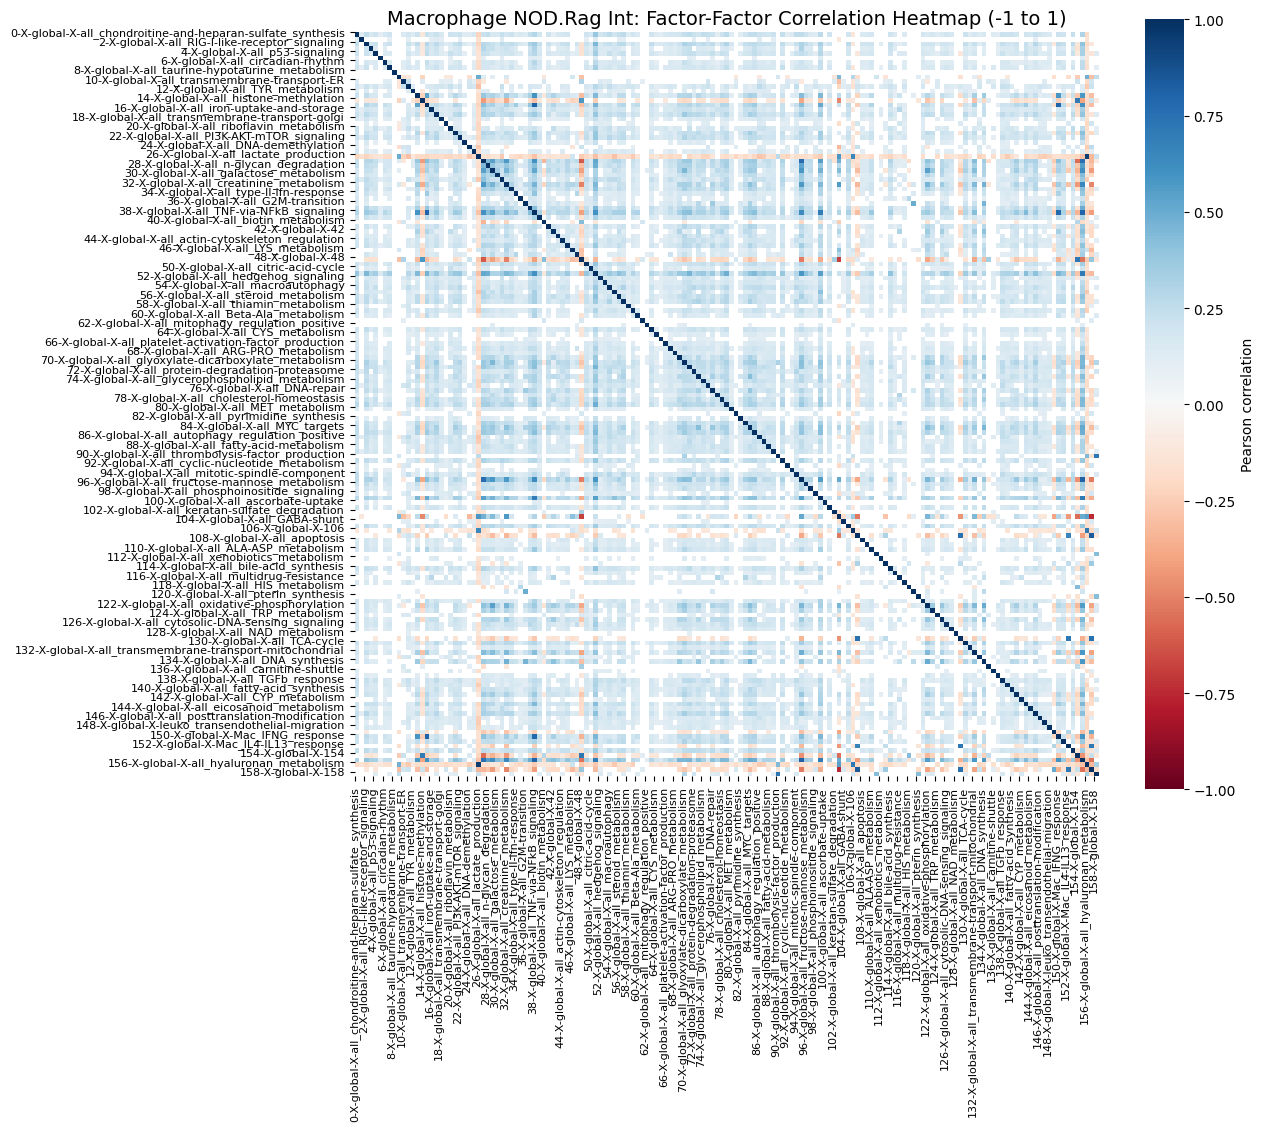

In [28]:
# Adjust figure size
plt.figure(figsize=(12, 10))

# Create heatmap with adjusted label rotation and font size
sns.heatmap(factor_correlation, cmap='RdBu', center=0, vmin=-1, vmax=1, mask=mask, square=True,
            cbar_kws={'label': 'Pearson correlation'}, xticklabels=factor_names, yticklabels=factor_names)

plt.title("Macrophage NOD.Rag Int: Factor-Factor Correlation Heatmap (-1 to 1)", fontsize=14)

# Rotate x and y-axis labels for readability
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)

n = 2  # Show every 5th label
plt.xticks(ticks=range(0, len(factor_names), n), labels=[factor_names[i] for i in range(0, len(factor_names), n)], rotation=90, fontsize=8)
plt.yticks(ticks=range(0, len(factor_names), n), labels=[factor_names[i] for i in range(0, len(factor_names), n)], rotation=0, fontsize=8)

# Save the heatmap
heatmap_filename = os.path.join("/Users/jyotirmoyroy/Desktop/Immunometabolism T1D Paper/Data/Sequencing/SingleCellRNASeq/Spectra/T1D_Timepoints/Macrophage/Mac_NODRagInt_factor_correlation_heatmap_Mac.png")
plt.savefig(heatmap_filename, format='png', dpi=300, bbox_inches='tight')

plt.show()


In [51]:
Mac_NODRagInt.obs['group']

T1D_Timepoints_AAACCAATCTAAGTCTAGAGGCAA-1    Non-Progressor
T1D_Timepoints_AAGCGGCTCCGCACCAAGAGGCAA-1    Non-Progressor
T1D_Timepoints_AAGGGAGGTTAGCATCAGAGGCAA-1    Non-Progressor
T1D_Timepoints_AATGGATGTAAGGTTGAGAGGCAA-1    Non-Progressor
T1D_Timepoints_AATGGATGTAAGTCGAAGAGGCAA-1    Non-Progressor
                                                  ...      
NODRag_TTTGGAGCAGAAGTGC-1                            NODRag
NODRag_TTTGGAGCAGCAGATG-1                            NODRag
NODRag_TTTGGTTTCATTGCTT-1                            NODRag
NODRag_TTTGTTGCAATCGCGC-1                            NODRag
NODRag_TTTGTTGGTGTGTCGC-1                            NODRag
Name: group, Length: 4218, dtype: category
Categories (3, object): ['NODRag', 'Non-Progressor', 'Progressor']

In [38]:
print(Mac_NODRagInt.var.columns)  # Should not contain '_index'
if Mac_NODRagInt.raw is not None:
    print(Mac_NODRagInt.raw.var.columns)  # Should not contain '_index'


Index(['features', 'SCT_features', 'highly_variable', 'means', 'dispersions',
       'dispersions_norm', 'spectra_vocab'],
      dtype='object')
Index(['_index'], dtype='object')


In [39]:
if Mac_NODRagInt.raw is not None:
    if "_index" in Mac_NODRagInt.raw.var.columns:
        Mac_NODRagInt.raw.var.rename(columns={"_index": "index_var"}, inplace=True)
        # OR
        # Mac_NODRagInt.raw.var.drop(columns=["_index"], inplace=True)


In [40]:
print(Mac_NODRagInt.var.columns)  # Should not contain '_index'
if Mac_NODRagInt.raw is not None:
    print(Mac_NODRagInt.raw.var.columns)  # Should not contain '_index'


Index(['features', 'SCT_features', 'highly_variable', 'means', 'dispersions',
       'dispersions_norm', 'spectra_vocab'],
      dtype='object')
Index(['index_var'], dtype='object')


In [41]:
#Save the Mac file
import scanpy as sc
import os

# Define output file path
output_file = "/Users/jyotirmoyroy/Desktop/Immunometabolism T1D Paper/Data/Sequencing/SingleCellRNASeq/Spectra/T1D_Timepoints/Macrophage/NODRag_Int_Mac_T1DTimepoints_Spectra.h5ad"

# Save the AnnData object
Mac_NODRagInt.write(output_file)

#print(f"Mac object saved as: {output_file}")


In [43]:
output_dir = "/Users/jyotirmoyroy/Desktop/Immunometabolism T1D Paper/Data/Sequencing/SingleCellRNASeq/Spectra/T1D_Timepoints/Macrophage/"  # Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)
correlations_filename = os.path.join(output_dir, "Significant_correlations_MacNODRag.csv")
correlations_df = pd.DataFrame(significant_correlations, columns=["Factor 1", "Factor 2", "Correlation"])
correlations_df.to_csv(correlations_filename, index=False)

print(f"Significant correlations saved to: {correlations_filename}")

Significant correlations saved to: /Users/jyotirmoyroy/Desktop/Immunometabolism T1D Paper/Data/Sequencing/SingleCellRNASeq/Spectra/T1D_Timepoints/Macrophage/Significant_correlations_MacNODRag.csv


In [46]:
Mac_NODRagInt.obs['group']

T1D_Timepoints_AAACCAATCTAAGTCTAGAGGCAA-1    Non-Progressor
T1D_Timepoints_AAGCGGCTCCGCACCAAGAGGCAA-1    Non-Progressor
T1D_Timepoints_AAGGGAGGTTAGCATCAGAGGCAA-1    Non-Progressor
T1D_Timepoints_AATGGATGTAAGGTTGAGAGGCAA-1    Non-Progressor
T1D_Timepoints_AATGGATGTAAGTCGAAGAGGCAA-1    Non-Progressor
                                                  ...      
NODRag_TTTGGAGCAGAAGTGC-1                            NODRag
NODRag_TTTGGAGCAGCAGATG-1                            NODRag
NODRag_TTTGGTTTCATTGCTT-1                            NODRag
NODRag_TTTGTTGCAATCGCGC-1                            NODRag
NODRag_TTTGTTGGTGTGTCGC-1                            NODRag
Name: group, Length: 4218, dtype: category
Categories (3, object): ['NODRag', 'Non-Progressor', 'Progressor']

In [47]:
pip install statannotations

Note: you may need to restart the kernel to use updated packages.


In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statannotations.Annotator as Annotator
from statsmodels.stats.multitest import multipletests

In [104]:
output_filepath

'/Users/jyotirmoyroy/Desktop/Immunometabolism_T1D_Paper/Data/Sequencing/SingleCellRNASeq/Significant_Correlations_Week6_Mac_20250219_144953.csv'

In [20]:
#Mac=sc.read("/Users/jyotirmoyroy/Desktop/Immunometabolism T1D Paper/Data/Sequencing/SingleCellRNASeq/Spectra/T1D_Timepoints/Macrophage/Mac_T1DTimepoints_Spectra.h5ad")

In [52]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
import numpy as np  # Import numpy for log2 transformation

# Extract relevant data
spectra_scores = Mac_NODRagInt.obsm['SPECTRA_cell_scores']  # Cell-factor score matrix
groups = Mac_NODRagInt.obs['group']  # Group labels (Progressor, Non-Progressor, NODRag)
factor_names = Mac_NODRagInt.uns['SPECTRA_overlap'].index.tolist()  # Get full factor names

# Convert to DataFrame and assign proper factor names
df_spectra = pd.DataFrame(spectra_scores, index=Mac_NODRagInt.obs_names, columns=factor_names)
df_spectra['group'] = groups.values

# Prepare list to store results
results = []

for factor in factor_names:  # Iterate over full factor names
    # Extract cell-level scores for each group
    group_nodrag = df_spectra[df_spectra['group'] == 'NODRag'][factor]
    group_other = df_spectra[df_spectra['group'].isin(['Progressor', 'Non-Progressor'])][factor]

    if len(group_nodrag) > 0 and len(group_other) > 0:  # Ensure both groups have values
        # Perform Mann-Whitney U-test
        stat, p_value = stats.mannwhitneyu(group_nodrag, group_other, alternative='two-sided')

        # Compute log2 fold change (log2FC = log2(NODRag mean / Other mean))
        mean_nodrag = group_nodrag.mean()
        mean_other = group_other.mean()
        log2_fc = np.log2(mean_nodrag / mean_other) if mean_other > 0 else None  # Avoid log(0)

        # Append results
        results.append({
            'Factor': factor,  # Use full factor name
            'p_value': p_value,
            'log2FC': log2_fc
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Adjust p-values using Benjamini-Hochberg (FDR correction)
results_df['FDR'] = multipletests(results_df['p_value'], method='fdr_bh')[1]

# Save results to CSV
output_path = "/Users/jyotirmoyroy/Desktop/Immunometabolism T1D Paper/Data/Sequencing/SingleCellRNASeq/Spectra/T1D_Timepoints/Macrophage/NODRag_vs_Others_Cellwise_Factors_pvalue_log2FC.csv"
results_df.to_csv(output_path, index=False)

print(f"Results saved to {output_path}")


Results saved to /Users/jyotirmoyroy/Desktop/Immunometabolism T1D Paper/Data/Sequencing/SingleCellRNASeq/Spectra/T1D_Timepoints/Macrophage/NODRag_vs_Others_Cellwise_Factors_pvalue_log2FC.csv
